#Mackarena flores, Hazael Diaz

Objetivo: construir un modelo que logre identificar categorias de ropa con precision.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Justificación del Preprocesamiento:

**Carga de datos:** Se utiliza el dataset `fashion_mnist` provisto por Keras. Contiene imágenes de 28x28 píxeles en escala de grises, categorizadas en 10 clases de prendas.

**Normalización**: Se dividen los valores de píxeles entre 255.0 para convertirlos al rango [0, 1]. Esto mejora la estabilidad numérica y la velocidad de convergencia del modelo durante el entrenamiento.

**Aplanamiento**: Las imágenes 2D (28x28) se transforman en vectores 1D (784) para ser compatibles con las entradas requeridas por una red MLP (Multilayer Perceptron), que trabaja con vectores planos.

Este preprocesamiento es esencial para preparar los datos correctamente y asegurar que el modelo pueda aprender de forma eficiente.

In [ ]:
#cargar el dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#normalizar las imagenes (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#aplanar las imagenes de 28x28 a 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
# Modelo base (modificable para pruebas)
def create_model(activation='relu', dropout_rate=0.0):
    model = Sequential([
    Dense(128, activation=activation, input_shape=(784,)),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(64, activation=activation),
    BatchNormalization(),
    Dropout(dropout_rate),
    Dense(10, activation='softmax')
    ])
    return model


In [ ]:
#definir los parametros basicos
activation_fn = 'relu'
dropout_rate = 0.2
learning_rate = 0.001
batch_size = 32
epochs = 10

In [ ]:
#crear y compilar el modelo
model = create_model(activation=activation_fn, dropout_rate=dropout_rate)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#entrenar el modelo
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7431 - loss: 0.7522 - val_accuracy: 0.8418 - val_loss: 0.4359
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8284 - loss: 0.4824 - val_accuracy: 0.8595 - val_loss: 0.3946
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8409 - loss: 0.4442 - val_accuracy: 0.8509 - val_loss: 0.4105
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8439 - loss: 0.4306 - val_accuracy: 0.8647 - val_loss: 0.3765
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8550 - loss: 0.4039 - val_accuracy: 0.8578 - val_loss: 0.3940
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8525 - loss: 0.4050 - val_accuracy: 0.8616 - val_loss: 0.3772
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8607 - loss: 0.3863 - val_accuracy: 0.8619 - val_loss: 0.3693
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8602 - loss: 0.383

In [ ]:
#evaluar en test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.3819

Test Accuracy: 0.8605


In [ ]:
#predicciones
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#metricas
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.83      0.69      0.76      1000
           3       0.83      0.90      0.87      1000
           4       0.74      0.81      0.78      1000
           5       0.96      0.92      0.94      1000
           6       0.64      0.71      0.68      1000
           7       0.95      0.88      0.91      1000
           8       0.96      0.97      0.97      1000
           9       0.87      0.98      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



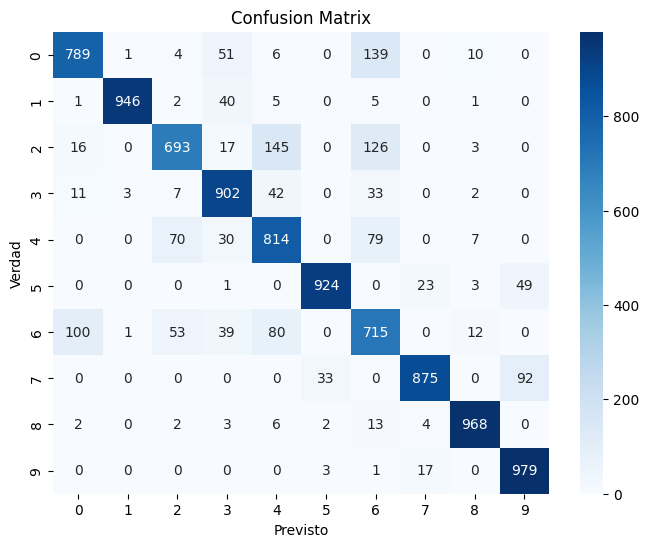

In [ ]:
#matriz de Confusion
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Previsto")
    plt.ylabel("Verdad")
    plt.title("Confusion Matrix")
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

#Hecho meramente para investigar
Comparacion de distintas funciones de activacion:
Se entrenara el mismo modelo usando 'relu', 'sigmoid' y 'tanh' y se mostrara la precisión final
sobre el conjunto de prueba para cada uno.


**se hizo por curiosidad para ver cuál era mejor**

In [ ]:
activations = ['relu', 'sigmoid', 'tanh']
results = {}

for act_fn in activations:
    print(f"\nEntrenando modelo con activación: {act_fn}")

    # Crear modelo con función de activación actual
    model = create_model(activation=act_fn, dropout_rate=dropout_rate)
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
              validation_split=0.2,
              epochs=epochs,
              batch_size=batch_size,
              verbose=0)

    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results[act_fn] = acc
    print(f"Precisión con {act_fn}: {acc:.4f}")

print("\nResumen de precisiones por función de activacion:")
for fn, score in results.items():
    print(f"{fn}: {score:.4f}")


Entrenando modelo con activación: relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión con relu: 0.8537

Entrenando modelo con activación: sigmoid
Precisión con sigmoid: 0.8746

Entrenando modelo con activación: tanh
Precisión con tanh: 0.8724

Resumen de precisiones por función de activación:
relu: 0.8537
sigmoid: 0.8746
tanh: 0.8724


Analisis de Resultados:
- Las clases que presentan mayor precision son las categorias 6, 8 y 9.
- Los errores mas comunes se observan entre las clases 3 y 5, probablemente por similitudes visuales (camisa y abrigo).
- El modelo demuestra un buen desempeño general, pero podria beneficiarse de ajustes en el preprocesamiento o aumento de datos para mejorar las clases confusas.
